<a href="https://colab.research.google.com/github/Sercan-dev/ads_click_prediction/blob/main/ads_click_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('/content/advertising.csv')

In [4]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Text(0.5, 1.05, 'Overview of relathionships between numerical features')

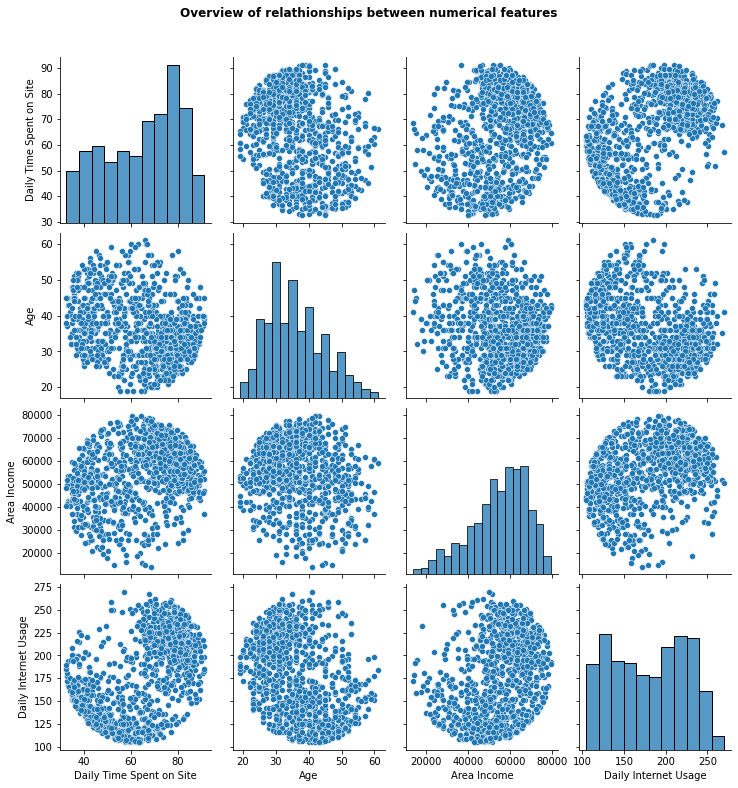

In [7]:
# pairplot correlations

columns_num= df[['Daily Time Spent on Site','Age','Area Income', 'Daily Internet Usage']]
sns.pairplot(columns_num,height=2.6)
plt.suptitle("Overview of relathionships between numerical features", y=1.05,weight='bold')

In [8]:
# examine categorical features
obj_var = ['Ad Topic Line', 'City', 'Country']
df[obj_var].describe(include=['O'])

,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Intuitive radical forecast,Williamsport,Czech Republic
freq,1,3,9


All the values in column "Ad Topic Line" are unique, while the "City" column contains 969 unique values out of 1000.

There are too many unique values within these two categorical columns which makes it difficult to perform a prediction without the existence of any patterns. Because of that, they will be removed from the dataset.

In [9]:
# get countries with the highest number of visitors
pd.crosstab(index=df['Country'], columns='count').sort_values(['count'], ascending=False).head(15)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


There are 237 different unique countries in our dataset and no single country is too dominant. This will not allow a machine learning model to establish valuable relationships. For that reason, this variable will be removed too.

In [10]:
df = df.drop(['Ad Topic Line', 'City', 'Country'], axis=1)

# Analyze the Timestamp
Get exact time when a user clicked on the advertisement. For that i create 4 new columns: 

*   Day of the Month
*   Day of the Week
*   Month
*   Hour


In [11]:
#create new features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Month'] = df['Timestamp'].dt.month
df['Day of the month'] = df['Timestamp'].dt.day
df["Day of the week"] = df['Timestamp'].dt.dayofweek
df['Hour'] = df['Timestamp'].dt.hour
df = df.drop(['Timestamp'], axis=1)

df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day of the month,Day of the week,Hour
0,68.95,35,61833.90,256.09,0,0,3,27,6,0
1,80.23,31,68441.85,193.77,1,0,4,4,0,1
2,69.47,26,59785.94,236.50,0,0,3,13,6,20
3,74.15,29,54806.18,245.89,1,0,1,10,6,2
4,68.37,35,73889.99,225.58,0,0,6,3,4,3


In [12]:
df.nunique()

Daily Time Spent on Site     900
Age                           43
Area Income                 1000
Daily Internet Usage         966
Male                           2
Clicked on Ad                  2
Month                          7
Day of the month              31
Day of the week                7
Hour                          24
dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

X = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage',
    'Male', 'Month', 'Day of the month' ,'Day of the week']]
y = df['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


I used the XGBboost model to predict ad clicks

In [23]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


##Fit the model
model = XGBClassifier()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)


##Print the accuracy of the model
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

print('Confusion matrix:')
print(confusion_matrix(y_test, pred_test))

****Train Results****
Accuracy: 100.0000%
****Test Results****
Accuracy: 94.2424%
Confusion matrix:
[[156   6]
 [ 13 155]]


The confusion matrix tells us that the total number of accurate predictions is 156 + 155 = 311. On the other hand, the number of incorrect predictions is 13 + 6 = 19. The result is 94.24% accuracy.

In [24]:
matrix_train = confusion_matrix(y_train, pred_train)
matrix_test = confusion_matrix(y_test, pred_test)

print(matrix_train)
print(matrix_test)

report_train = classification_report(y_train, pred_train)
report_test = classification_report(y_test, pred_test)

print(report_train)
print(report_test)


print(model.get_booster().feature_names)

[[338   0]
 [  0 332]]
[[156   6]
 [ 13 155]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       338
           1       1.00      1.00      1.00       332

    accuracy                           1.00       670
   macro avg       1.00      1.00      1.00       670
weighted avg       1.00      1.00      1.00       670

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       162
           1       0.96      0.92      0.94       168

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330

['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Month', 'Day of the month', 'Day of the week']


In [ ]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
%%time
parameters = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'max_depth': [5, 6, 8, 10, 12],
    'gamma': [0.001, 0.005, 0.01, 0.02],
    'reg_lambda': [10.0, 20, 100],

}

eval_set=[(X_test, y_test)]
model_xgb = XGBClassifier(eval_set=eval_set, objective='binary:logistic', verbose=False, subsample=0.9, colsample_bytree=0.5, early_stopping_rounds=10)
clf = GridSearchCV(model_xgb, parameters)

clf.fit(X_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

In [29]:
## retrain fine tuned model 
eval_set=[(X_test, y_test)]
model_xgb = xgb.XGBClassifier( **clf.best_params_ )
model_xgb.fit(X_train, y_train, eval_set=eval_set, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.001, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=100, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
##Fit the model
model_xgb = XGBClassifier(**clf.best_params_)
model_xgb.fit(X_train, y_train)
pred_train = model_xgb.predict(X_train)
pred_test = model_xgb.predict(X_test)


##Print the accuracy of the model
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

****Train Results****
Accuracy: 98.5075%
****Test Results****
Accuracy: 95.1515%


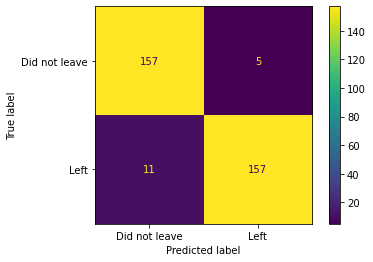

In [37]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model_xgb,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=['Did not leave', 'Left'])